In [5]:
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# load model
model_dir = "./models"
model_h5_file = os.path.join(model_dir, "model_task_1_cnn_classification.h5")

model = load_model(model_h5_file)

2024-04-30 14:15:55.167387: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


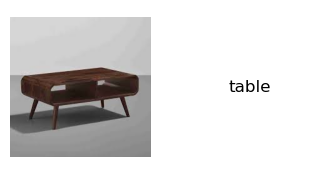

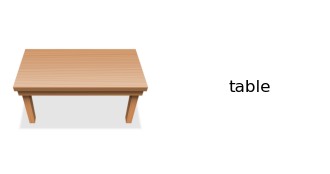

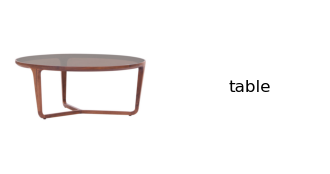

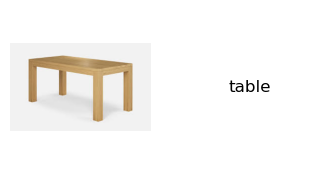

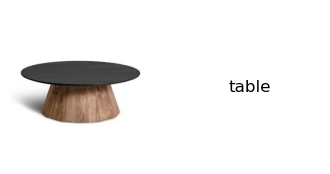

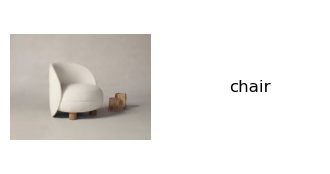

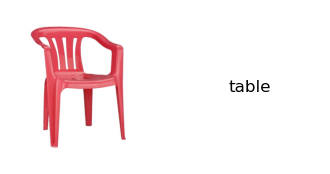

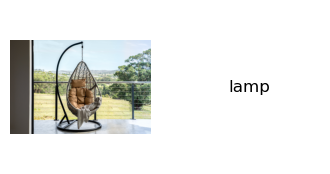

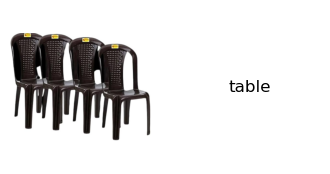

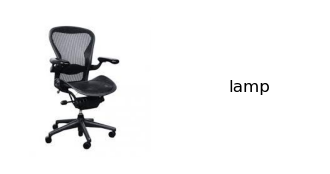

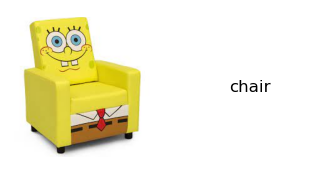

In [6]:
# Hardcode label for now
furnitures = ['table', 'sofa', 'lamp', 'chair', 'dresser', 'bed']

# furnitures = list(furniture_indexes.keys())

def _get_image(img_path):
    image = cv2.imread(img_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


def predict_furniture(img):
    # Resize the image to match your model's input size
    img_resized = cv2.resize(img, (50, 50))  # Update img_width and img_height with your image size
    
    # Expand dimensions to create a batch dimension
    img_array = np.expand_dims(img_resized, axis=0)
    
    # Make predictions
    predictions = model.predict(img_array, verbose = 0)
    predicted_class_index = np.argmax(predictions)
    
    return furnitures[predicted_class_index-1]

def visualize(img, text):
    plt.figure(figsize=(4, 2))  # Adjust the figure size as needed
    plt.subplot(1, 2, 1)  # Create a subplot for the image
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 2, 2)  # Create a subplot for the text
    plt.text(0.5, 0.5, text, ha='center', va='center', fontsize=12)  # Adjust the position and font size as needed
    plt.axis('off')

    plt.show()

def show_prediction(img_path):
    img = _get_image(img_path)
    prediction = predict_furniture(img)
    visualize(img, prediction)


    
for i in range(1,12):
    img_path = f'./Custom_Furniture_Data/custom-test-table-{i}.png'
    show_prediction(img_path)
    
# Load the image
# img_path = './Custom_Furniture_Data/custom-test-table-11.png'  # Update with the path to your image
# predict_furniture(img_path)